In [2]:
import os, json, torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.chdir("output/fhir")
fL = os.listdir()

In [50]:
cndtns = [ ent for ent in filE if ent["resource"]["resourceType"]  == "Condition"]

In [56]:
conditions1 = [cnd['resource']['code']['coding'][0]['display'] for cnd in cndtns]

In [57]:
conditions1

['Hypertension',
 'Prediabetes',
 'Miscarriage in first trimester',
 'Osteoarthritis of knee',
 'Viral sinusitis (disorder)',
 'Viral sinusitis (disorder)',
 'Chronic congestive heart failure (disorder)',
 'Sprain of ankle']

In [9]:
totObsList = []
for f in fL:
    #print (f)
    patFile = open(f)
    try:
        patJSON = json.load(patFile)
    except:
        continue
    patEntry = patJSON['entry']
    try:
        name = patEntry[0]['resource']['name'][0]['given'][0] + " " + patEntry[0]['resource']['name'][0]['family']
    except:
        continue
    patCO2 = [(name,ent['resource']['valueQuantity']['value'],ent['resource']['effectiveDateTime']) for ent in patEntry if ent['resource']['resourceType'] =="Observation" and ent['resource']['category'][0]['coding'][0]['code']=="laboratory" and ent['resource']['code']['text'] == "Carbon Dioxide"]
    #observations = [cnd['resource']['code']['coding'][0]['display'] for cnd in patObservations]
    totObsList.append(patCO2)
    patFile.close()

##### When we are trying to run this with a huge data set, we can try to filter out for common diseases such as a cold that may not affect the disease that we are analyzing 

In [18]:
avgListWName = []
for person in totObsList:
    total = 0
    for CO2Obs in person:
        total += CO2Obs[1]
    if not total == 0:
        avg = total/(len(person))
        avgList.append((CO2Obs[0],avg))


In [21]:
avgList = []
for person in totObsList:
    total = 0
    for CO2Obs in person:
        total += CO2Obs[1]
    if not total == 0:
        avg = total/(len(person))
        avgList.append(avg)

In [24]:
npAVL = np.array(avgList)

In [29]:
len(totObsList)

565

(array([  5.,  10.,  25.,  52., 148., 201.,  82.,  25.,  10.,   2.]),
 array([20.34      , 21.13533333, 21.93066667, 22.726     , 23.52133333,
        24.31666667, 25.112     , 25.90733333, 26.70266667, 27.498     ,
        28.29333333]),
 <a list of 10 Patch objects>)

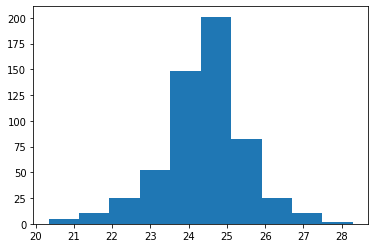

In [27]:
plt.hist(npAVL)